<a href="https://colab.research.google.com/github/SchmetterlingIII/D.T./blob/main/task11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# what's next?
- add colours to 11C
- add slider to 11D

# CHALLENGE 11A

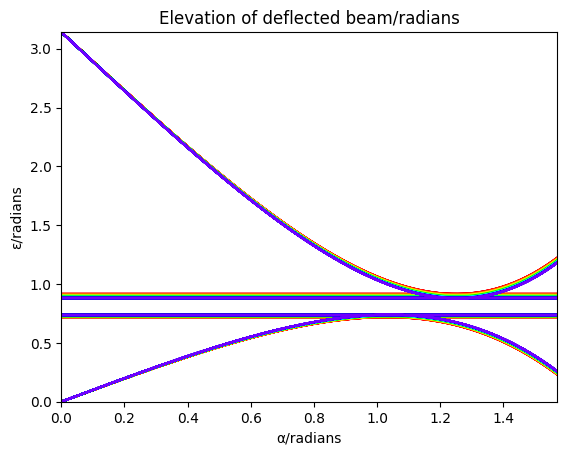

In [2]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# constants
n = 1
c = 3*(10**8) # ms^-1

# water
n_water = []

wavelength = (np.arange(405, 705, 1)) / 10 ** 9
frequency_list = [(c/wl) for wl in wavelength] # in Hz

for frequency in frequency_list:
    embed_1 = np.sqrt(1/(1.731 - 0.261 *((frequency/(10**15))**2)))
    n_discrete = np.sqrt(embed_1 + 1)
    n_water.append(n_discrete)

# create functions for the primary and secondary angles and then in the loop only call the functions


def primary_angle(n_water): # inputting the refractive index iteratable
  # angles

  alpha_deg = np.linspace(0, 100, 350) # incident rays in degrees
  alpha = np.radians(alpha_deg)
  beta = [np.arcsin(((n)*(np.sin(i)))/(n_water)) for i in alpha]

  epsilon_primary = []
  for i in range(len(alpha_deg)):
      epsilon_primary.append((4 * beta[i]) - (2 * alpha[i]))


  # turning point (verification)

  alpha_zero = np.arcsin(((4 - (n_water)**2)/(3))**0.5)
  critical_y_primary = (4 * (np.arcsin(((n)*(np.sin(alpha_zero)))/(n_water)))) - 2 * (alpha_zero)

  return alpha, epsilon_primary, alpha_zero, critical_y_primary

def secondary_angle(n_water):
  epsilon_secondary = []
  for i in range(len(alpha)):
      epsilon_secondary.append((np.pi) - (6 * (np.arcsin((np.sin(alpha[i]))/(n_water)))) + (2 * alpha[i]))

  alpha_zero_secondary = np.arcsin(np.sqrt((9 - (n_water)**2)/(8)))
  critical_y_secondary = (np.pi) - (6 * (np.arcsin((np.sin(alpha_zero_secondary))/(n_water)))) + (2 * alpha_zero_secondary)

  return alpha, epsilon_secondary, alpha_zero_secondary, critical_y_secondary

colours = cm.gist_rainbow(np.linspace(0, 0.8495, len(n_water))) # adjusting values qualitatively and not directly representative of frequency

for i in range(len(n_water)):
  # call both functions

  alpha, epsilon_primary, alpha_zero, critical_y_primary = primary_angle(n_water[i])

  alpha, epsilon_secondary, alpha_zero_secondary, critical_y_secondary = secondary_angle(n_water[i])

  ## primary & secondary
  plt.plot((alpha), (epsilon_primary), color = colours[i]) # primary
  plt.plot((alpha), (epsilon_secondary), color = colours[i]) # secondary

  ## turning point {where the rainbows are seen?}
  plt.hlines(y=[critical_y_primary, critical_y_secondary], xmin=0, xmax=5, colors=[colours[i], colours[i]], linestyles=['-', '-'])

## labelling

plt.ylabel("ε/radians")
plt.xlabel("α/radians")
plt.title("Elevation of deflected beam/radians")
plt.xlim(0, np.radians(90))
plt.ylim(0, np.radians(180))
plt.show()


# CHALLENGE 11B
Plot graphs of rainbow elevation against the frequency of light. Use the empirical model of n against f for water.

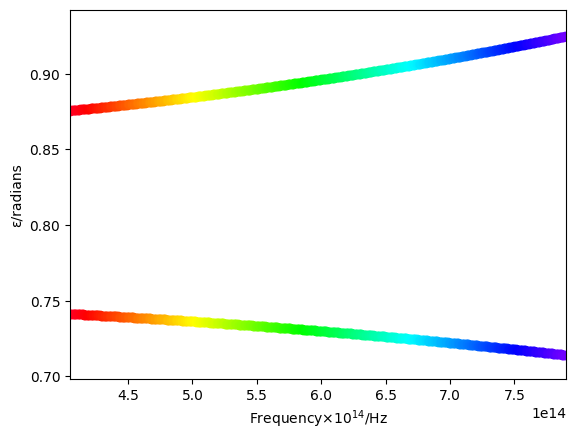

In [3]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# empirical model equation
frequency = [i*10**12 for i in range(405, 790, 1)] # metres
refractive_index = [np.sqrt(1 + (np.sqrt(1 / (1.731 - 0.261 * (freq*10**-15)**2)))) for freq in frequency]

## primary rainbow
theta_1 = [np.arcsin(np.sqrt((4-(n**2))/(3))) for n in refractive_index]
epsilon_1 = []
for i in range(len(frequency)):
    epsilon_1.append(4 * (np.arcsin(np.sin(theta_1[i]) / refractive_index[i])) - 2 * theta_1[i])

## secondary rainbow
theta_2 = [np.arcsin(np.sqrt((9 - n**2)/(8))) for n in refractive_index]
epsilon_2 = []
for i in range(len(frequency)):
    epsilon_2.append(np.pi - (6 * np.arcsin((np.sin(theta_2[i])) / refractive_index[i])) + 2 * (theta_2[i]))

# remember to convert to degrees later on

# plotting
### get the colours for each of the sections
colours = cm.gist_rainbow(np.linspace(0, 0.8495, len(frequency)))
ax = plt.gca()
ax.set(xlim=[405*10**12, 790*10**12], ylim=np.radians([40, 54]))

for i in range(len(frequency)):
    plt.plot(frequency[i], (epsilon_2[i]), 'o--', color = colours[i])
    plt.plot(frequency[i], (epsilon_1[i]), 'o--', color = colours[i])

plt.xlabel(r"Frequency$\times10 ^{14}$/Hz") # to change to make it read like terahertz
plt.ylabel("ε/radians")
plt.show()

# CHALLENGE 11C



The loss of each of the rays is the input angle minus the emergent ray: ($\theta - \epsilon$).

The graph requires this difference to be for when these input angles are used:
- critical angle (black line)
- primary rainbow (red line)
- secondary rainbow (blue line)

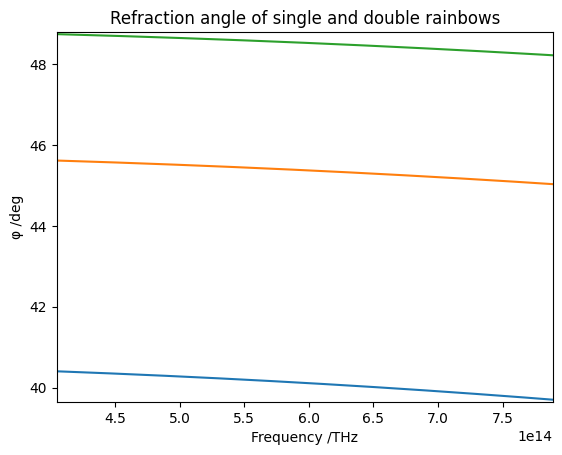

In [13]:
### sin(theta) = n * sin(phi)

# import modules
import numpy as np
import matplotlib.pyplot as plt

# empirical model equation
frequency = [i*10**12 for i in range(405, 790, 1)] # metres
refractive_index = [np.sqrt(1 + (np.sqrt(1 / (1.731 - 0.261 * (freq*10**-15)**2)))) for freq in frequency]

## primary rainbow
theta_1 = [np.arcsin(np.sqrt((4-(n**2))/(3))) for n in refractive_index]
phi_1 = []
for i in range(len(frequency)):
    phi_1.append(np.arcsin((np.sin(theta_1[i]))/(refractive_index[i])))

## secondary rainbow
theta_2 = [np.arcsin(np.sqrt((9-(n**2))/(8))) for n in refractive_index]
phi_2 = []
for i in range(len(frequency)):
    phi_2.append(np.arcsin((np.sin(theta_2[i]))/(refractive_index[i])))

## critical angle
theta_c = [np.arcsin(1/n) for n in refractive_index]

plt.plot(frequency, np.degrees(phi_1))
plt.plot(frequency, np.degrees(phi_2))
plt.plot(frequency, np.degrees(theta_c))

plt.ylim(np.degrees(min(phi_1))-0.05, np.degrees(max(theta_c))+0.05)
plt.xlim(min(frequency), max(frequency))

plt.xlabel("Frequency /THz")
plt.ylabel("\u03C6 /deg")
plt.title("Refraction angle of single and double rainbows")

plt.show()

# CHALLENGE 11D
Create a model of primary and secondary rainbows that you would see at sea level (with no topographic obstructions) for different angles of (anti) solar elevation.
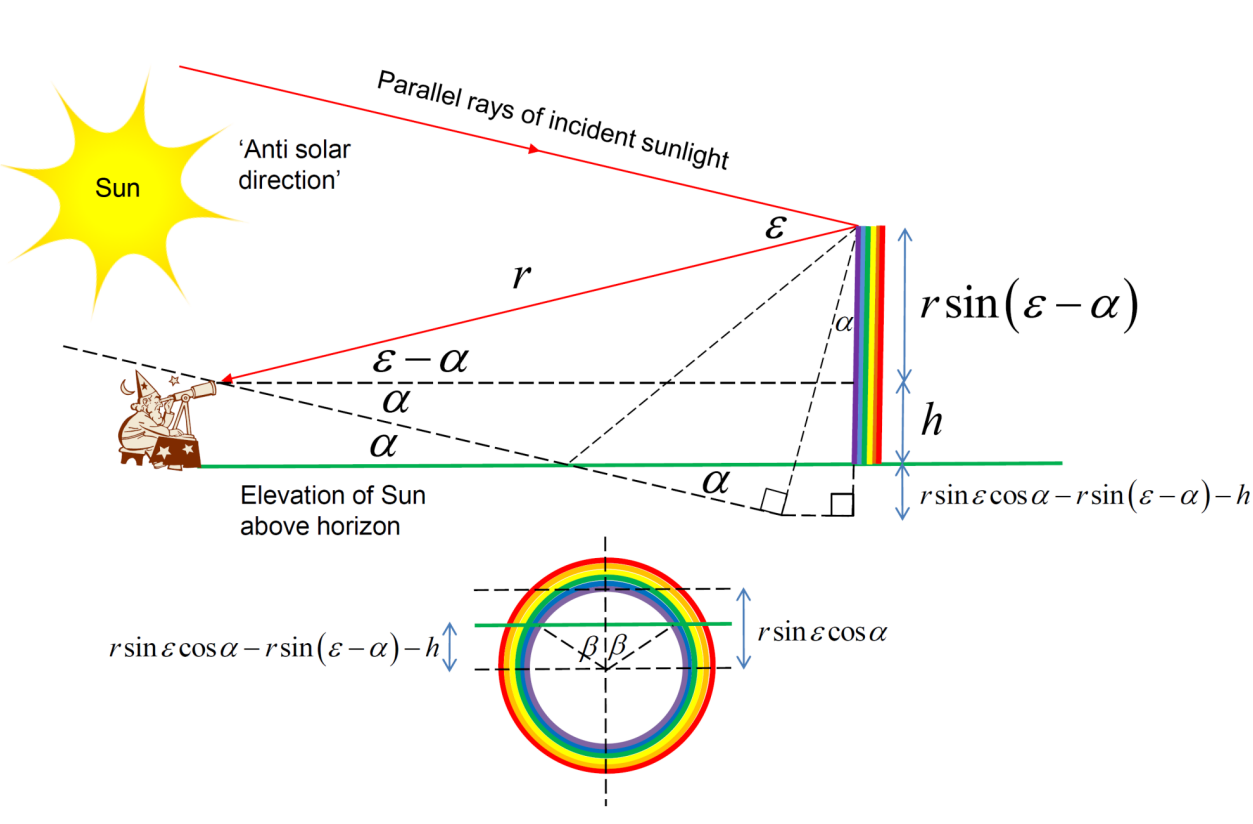

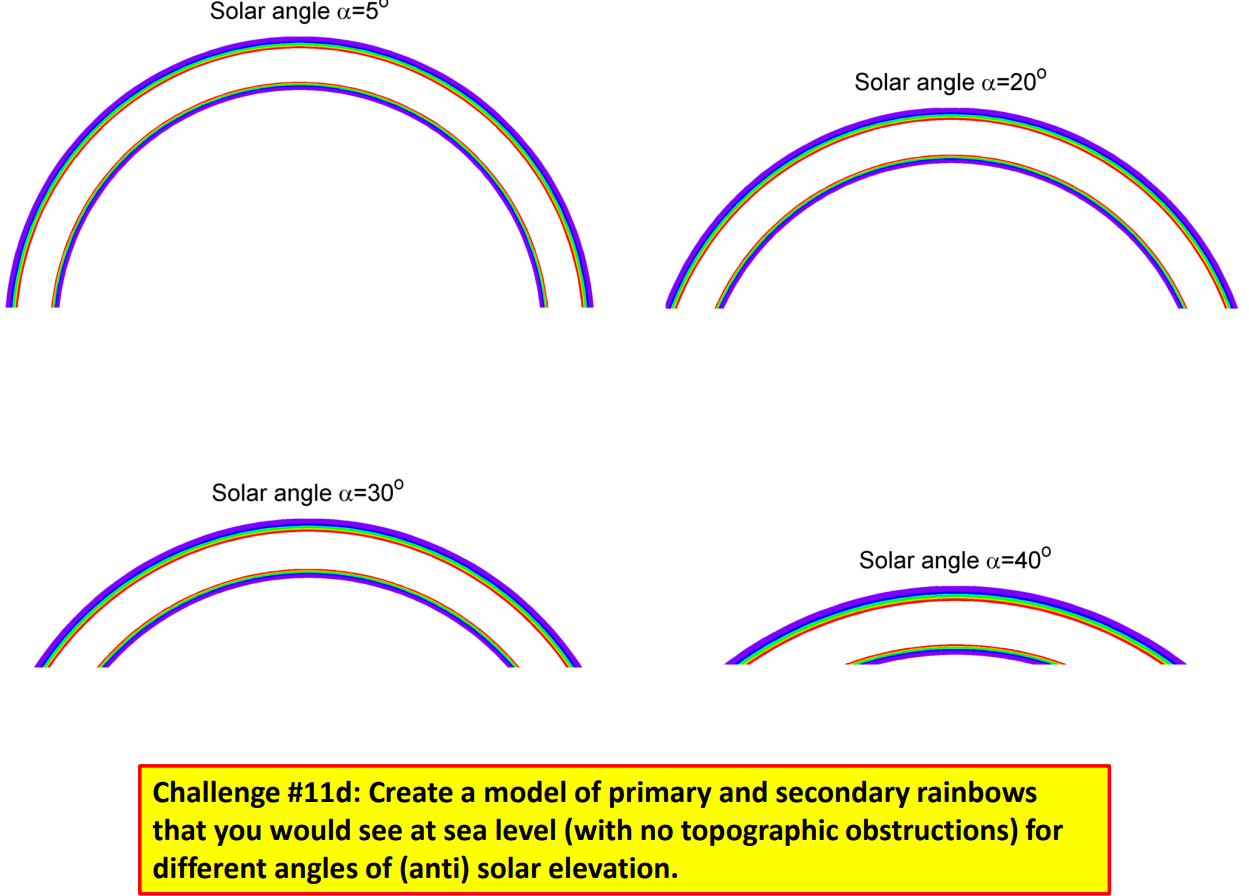

**ADD SLIDER INTO THIS TO ADJUST SOLAR ANGLE BETWEEN ENTIRE VISIBLE RANGE**

rainbow_thickness: 19.09 metres


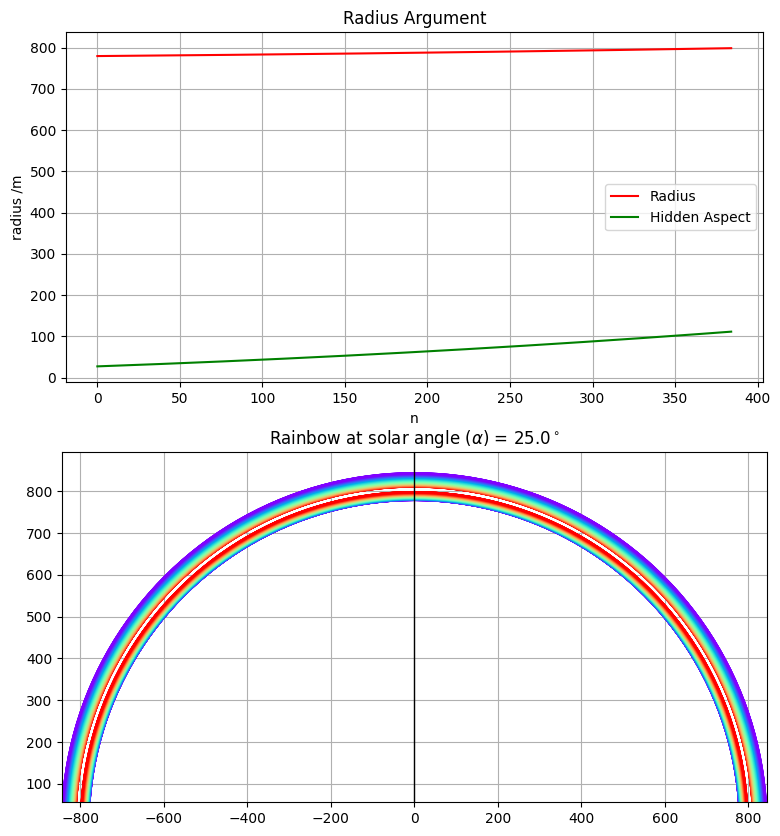

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, (ax1, ax2) = plt.subplots(2, figsize=(50,10))

# redefine the primary epsilon value
## - theta acts as the solar angle
## - the differences in values pertains to the change in refractive index of the water

# radius & constants
h = 1.250 # how heigh observer is from ground

solar_angle = np.radians(25)  # what will be changed, will make an iterating
                              # list of this for different values or make a
                              # discrete slider to indicate the rising sun

r = 2500 # distance from observer to rainbow

# radius_argument
radius_arg = r * np.cos(epsilon_1) * np.sin(solar_angle)
x = np.arange(0, len(radius_arg), 1)

# iterating steps
n = len(radius_arg) # higher the better
t = np.linspace(0, 2*np.pi, n) # circular parameter

# hidden part of rainbow
__ = (radius_arg - ((r * np.sin(epsilon_1 - solar_angle)) + h)) # treat it like a circle as well and find the point when x = 0; set this as the height and move on

# produce a similar parametrised circle
for i in range(len(__)):
  xx = __[i] * np.cos(t)
  yy = __[i] * np.sin(t)

"""
ax3.plot(xx, yy)
ax3.grid()
ax3.set_aspect(1)
ax3.set_title('Hidden Part of Rainbow')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
"""

ax1.plot(x, radius_arg, label="Radius", color='r')
ax1.plot(x, __, label="Hidden Aspect", color='g')
ax1.grid()
ax1.legend()
ax1.set_aspect(.25)
ax1.set_title('Radius Argument')
ax1.set_xlabel('n')
ax1.set_ylabel('radius /m')

# find minimum point of the list and stop iterating from that point
# this assumes that the points are symmetric
radius_arg_list = radius_arg.tolist()
min_point = radius_arg_list.index(min(radius_arg))

# colours
colours = cm.rainbow(np.linspace(0, 1, len(radius_arg) - min_point))

# radius argument for secondary angles
radius_arg_2 = r * np.sin(epsilon_2) * np.sin(solar_angle)
colours2 = cm.rainbow(np.linspace(1, 0, len(radius_arg) - min_point))

# plot
for i in range((len(radius_arg) - min_point) + 0):
  i += min_point
  x = radius_arg[i] * np.cos(t)
  y = radius_arg[i] * np.sin(t)
  x2 = radius_arg_2[i] * np.cos(t)
  y2 = radius_arg_2[i] * np.sin(t)
  ax2.plot(x, y, color=colours[i-min_point])
  ax2.plot(x2, y2, color=colours2[i-min_point])

# plot
ax2.axhline(y=0, lw=1, color='k')
ax2.axvline(x=0, lw=1, color='k')

ax2.grid()
ax2.set_aspect(1)
ax2.set_title(rf"Rainbow at solar angle ($\alpha$) = {np.degrees(solar_angle)}$^\circ$")
ax2.set_xlim(min(x2), max(x2))
ax2.set_ylim((max(yy)/2), max(y2) + 50) # this is where the changes occur (at the minimum of the y)


# Interesting Outputs
rainbow_thickness = max(radius_arg) - min(radius_arg)

print(f"rainbow_thickness: {rainbow_thickness:.2f} metres")

plt.show()